In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime as dt
import scipy.optimize as opt
import scipy.stats as st

In [3]:
# 4.3. Portfolio Optimization

# U.S. Total Stock Market
# International Total Stock Market
# U.S. Total Bond Market
# International Total Bond Market

# Data Query and Range Delimiting
poptquery = web.DataReader(['AGG', 'BWX', 'CWI', 'VTI' ], 'yahoo', '2006-04-01', '2016-05-01')
cpopt = poptquery['Close']
mpoptall = cpopt.asfreq('M', method='pad')
mpoptall.columns = ['mbonds', 'mibonds', 'mistocks', 'mstocks']


In [4]:
# Monthly and Annual Returns Calculation
mpoptall.loc[:, 'mstocksret'] = mpoptall.loc[:, 'mstocks'] / mpoptall.loc[:, 'mstocks'].shift(1) - 1
mpoptall.loc[:, 'astocksret'] = mpoptall.loc[:, 'mstocks'] / mpoptall.loc[:, 'mstocks'].shift(12) - 1

mpoptall.loc[:, 'mistocksret'] = mpoptall.loc[:, 'mistocks'] / mpoptall.loc[:, 'mistocks'].shift(1) - 1
mpoptall.loc[:, 'aistocksret'] = mpoptall.loc[:, 'mistocks'] / mpoptall.loc[:, 'mistocks'].shift(12) - 1

mpoptall.loc[:, 'mbondsret'] = mpoptall.loc[:, 'mbonds'] / mpoptall.loc[:, 'mbonds'].shift(1) - 1
mpoptall.loc[:, 'abondsret'] = mpoptall.loc[:, 'mbonds'] / mpoptall.loc[:, 'mbonds'].shift(12) - 1

mpoptall.loc[:, 'mibondsret'] = mpoptall.loc[:, 'mibonds'] / mpoptall.loc[:, 'mibonds'].shift(1) - 1
mpoptall.loc[:, 'aibondsret'] = mpoptall.loc[:, 'mibonds'] / mpoptall.loc[:, 'mibonds'].shift(12) - 1


In [5]:
# 4.3.1. Naive Global Portfolio Benchmark
mpoptall.loc[:, 'mnaiveret'] = 0.25 * mpoptall.loc[:, 'mbondsret'] + 0.25 * mpoptall.loc[:, 'mstocksret'] \
                                  + 0.25 * mpoptall.loc[:, 'mibondsret'] + 0.25 * mpoptall.loc[:, 'mistocksret']


In [6]:
# 4.3.2. Mean Maximization Portfolio

def mpopt1(weights1):
    bondsweight1 = weights1[0]
    stocksweight1 = weights1[1]
    ibondsweight1 = weights1[2]
    istocksweight1 = weights1[3]
    mpoptall.loc[:, 'mpoptret1'] = bondsweight1 * mpoptall.loc[:, 'mbondsret'] \
                                   + stocksweight1 * mpoptall.loc[:, 'mstocksret'] + \
                                   ibondsweight1 * mpoptall.loc[:, 'mibondsret'] + \
                                   istocksweight1 * mpoptall.loc[:, 'mistocksret']
    # Maximization is equal to minimization of function multiplied by -1
    mpoptmean1 = (np.nanmean(mpoptall.loc[:, 'mpoptret1'])) * (-1)
    return mpoptmean1



In [7]:
# Sequential Least Squares Programming (SLSQP) optimization for sum of weights constraint.
# Weights must add up to 100% solved with lambda function.
weightssum1 = ({'type':'eq', 'fun': lambda weights1: sum(weights1)-1.})
weightsopt1 = opt.minimize(mpopt1, x0=[0.25, 0.25, 0.25, 0.25], method='SLSQP', bounds=[(0, 1), (0, 1), (0, 1), (0, 1)],
                           constraints=weightssum1)


In [8]:
# Asset Class Weights
bondsopt1 = weightsopt1.x[0]
stocksopt1 = weightsopt1.x[1]
ibondsopt1 = weightsopt1.x[2]
istocksopt1 = weightsopt1.x[3]


In [9]:
# 4.3.3. Standard Deviation Minimization Portfolio

def mpopt2(weights2):
    bondsweight2 = weights2[0]
    stocksweight2 = weights2[1]
    ibondsweight2 = weights2[2]
    istocksweight2 = weights2[3]
    mpoptall.loc[:, 'mpoptret2'] = bondsweight2 * mpoptall.loc[:, 'mbondsret'] \
                                   + stocksweight2 * mpoptall.loc[:, 'mstocksret'] + \
                                   ibondsweight2 * mpoptall.loc[:, 'mibondsret'] + \
                                   istocksweight2 * mpoptall.loc[:, 'mistocksret']
    mpoptstdev2 = np.nanstd(mpoptall.loc[:, 'mpoptret2'])
    return mpoptstdev2


In [10]:
# Sequential Least Squares Programming (SLSQP) optimization for sum of weights constraint.
# Weights must add up to 100% solved with lambda function.
weightssum2 = ({'type':'eq', 'fun': lambda weights2: sum(weights2)-1.})
weightsopt2 = opt.minimize(mpopt2, x0=[0.25, 0.25, 0.25, 0.25], method='SLSQP', bounds=[(0, 1), (0, 1), (0, 1), (0, 1)],
                           constraints=weightssum2)


In [11]:
# Asset Class Weights
bondsopt2 = weightsopt2.x[0]
stocksopt2 = weightsopt2.x[1]
ibondsopt2 = weightsopt2.x[2]
istocksopt2 = weightsopt2.x[3]


In [12]:
# 4.3.4. Quadratic Utility/Mean Maximization and Standard Deviation Minimization Portfolio

def mpopt3(weights3):
    bondsweight3 = weights3[0]
    stocksweight3 = weights3[1]
    ibondsweight3 = weights3[2]
    istocksweight3 = weights3[3]
    mpoptall.loc[:, 'mpoptret3'] = bondsweight3 * mpoptall.loc[:, 'mbondsret'] \
                                   + stocksweight3 * mpoptall.loc[:, 'mstocksret'] + \
                                   ibondsweight3 * mpoptall.loc[:, 'mibondsret'] + \
                                   istocksweight3 * mpoptall.loc[:, 'mistocksret']
    # Sharpe Ratio Maximization. Maximization is equal to minimization of function multiplied by -1
    mpoptsharpe3 = (np.nanmean(mpoptall.loc[:, 'mpoptret3']) / np.nanstd(mpoptall.loc[:, 'mpoptret3'])) *(-1)
    return mpoptsharpe3



In [13]:
# Sequential Least Squares Programming (SLSQP) optimization for sum of weights constraint.
# Weights must add up to 100% solved with lambda function.
weightssum3 = ({'type':'eq', 'fun': lambda weights3: sum(weights3)-1.})
weightsopt3 = opt.minimize(mpopt3, x0=[0.25, 0.25, 0.25, 0.25], method='SLSQP', bounds=[(0, 1), (0, 1), (0, 1), (0, 1)],
                           constraints=weightssum3)


In [14]:
# Asset Class Weights
bondsopt3 = weightsopt3.x[0]
stocksopt3 = weightsopt3.x[1]
ibondsopt3 = weightsopt3.x[2]
istocksopt3 = weightsopt3.x[3]


In [15]:
# 4.3.5. Mean Maximization and Value at Risk (VaR) Minimization Portfolio

def mpopt4(weights4):
    bondsweight4 = weights4[0]
    stocksweight4 = weights4[1]
    ibondsweight4 = weights4[2]
    istocksweight4 = weights4[3]
    mpoptall.loc[:, 'mpoptret4'] = bondsweight4 * mpoptall.loc[:, 'mbondsret'] \
                                   + stocksweight4 * mpoptall.loc[:, 'mstocksret'] + \
                                   ibondsweight4 * mpoptall.loc[:, 'mibondsret'] + \
                                   istocksweight4 * mpoptall.loc[:, 'mistocksret']
    # Mean Maximization per unit of VaR. Maximization is equal to minimization of function multiplied by -1
    mpoptmean4 = np.nanmean(mpoptall.loc[:, 'mpoptret4'])
    mpoptstdev4 = np.nanstd(mpoptall.loc[:, 'mpoptret4'])
    mpoptvar4 = st.norm.ppf(0.99, mpoptmean4, mpoptstdev4)
    mpoptmeanvar4 = (mpoptmean4 / mpoptvar4) *(-1)
    return mpoptmeanvar4


In [16]:
# Sequential Least Squares Programming (SLSQP) optimization for sum of weights constraint.
# Weights must add up to 100% solved with lambda function.
weightssum4 = ({'type':'eq', 'fun': lambda weights4: sum(weights4)-1.})
weightsopt4 = opt.minimize(mpopt4, x0=[0.25, 0.25, 0.25, 0.25], method='SLSQP', bounds=[(0, 1), (0, 1), (0, 1), (0, 1)],
                           constraints=weightssum4)


In [17]:
# Asset Class Weights
bondsopt4 = weightsopt4.x[0]
stocksopt4 = weightsopt4.x[1]
ibondsopt4 = weightsopt4.x[2]
istocksopt4 = weightsopt4.x[3]


In [18]:
# 4.3.6. Optimized Portfolios Returns Comparison

# Cumulative Monthly Returns Calculation
mpoptall.loc[:, 'mpoptcum1'] = np.cumprod(mpoptall.loc[:, 'mpoptret1'] + 1) - 1
mpoptall.loc[:, 'mpoptcum2'] = np.cumprod(mpoptall.loc[:, 'mpoptret2'] + 1) - 1
mpoptall.loc[:, 'mpoptcum3'] = np.cumprod(mpoptall.loc[:, 'mpoptret3'] + 1) - 1
mpoptall.loc[:, 'mpoptcum4'] = np.cumprod(mpoptall.loc[:, 'mpoptret4'] + 1) - 1
mpoptall.loc[:, 'mnaivecum'] = np.cumprod(mpoptall.loc[:, 'mnaiveret'] + 1) - 1


In [19]:
# Annualized Monthly Returns Calculation
mpoptall.loc[:, 'mpoptcuma1'] = np.cumprod(mpoptall.loc[:, 'mpoptret1'] + 1) ** (12 / len(mpoptall)) - 1
mpoptall.loc[:, 'mpoptcuma2'] = np.cumprod(mpoptall.loc[:, 'mpoptret2'] + 1) ** (12 / len(mpoptall)) - 1
mpoptall.loc[:, 'mpoptcuma3'] = np.cumprod(mpoptall.loc[:, 'mpoptret3'] + 1) ** (12 / len(mpoptall)) - 1
mpoptall.loc[:, 'mpoptcuma4'] = np.cumprod(mpoptall.loc[:, 'mpoptret4'] + 1) ** (12 / len(mpoptall)) - 1
mpoptall.loc[:, 'mnaivecuma'] = np.cumprod(mpoptall.loc[:, 'mnaiveret'] + 1) ** (12 / len(mpoptall)) - 1


In [20]:
# Obtain last Annualized Monthly Return
lastdate = dt.datetime(2016, 3, 31)
mpoptreta1 = mpoptall.at[lastdate, 'mpoptcuma1']
mpoptreta2 = mpoptall.at[lastdate, 'mpoptcuma2']
mpoptreta3 = mpoptall.at[lastdate, 'mpoptcuma3']
mpoptreta4 = mpoptall.at[lastdate, 'mpoptcuma4']
mnaivereta = mpoptall.at[lastdate, 'mnaivecuma']


In [21]:
# Annualized Monthly Standard Deviation Calculation
mpoptstdeva1 = np.std(mpoptall.loc[:, 'mpoptret1']) * np.sqrt(12)
mpoptstdeva2 = np.std(mpoptall.loc[:, 'mpoptret2']) * np.sqrt(12)
mpoptstdeva3 = np.std(mpoptall.loc[:, 'mpoptret3']) * np.sqrt(12)
mpoptstdeva4 = np.std(mpoptall.loc[:, 'mpoptret4']) * np.sqrt(12)
mnaivestdeva = np.std(mpoptall.loc[:, 'mnaiveret']) * np.sqrt(12)


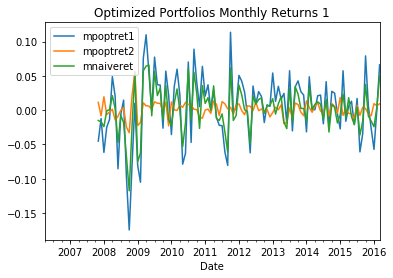

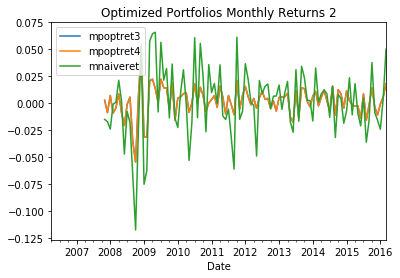

In [23]:
# 4.3.7. Portfolio Optimization Charts and Tables

# Monthly Returns Chart
mpoptall.plot(y=['mpoptret1', 'mpoptret2', 'mnaiveret'])
plt.title('Optimized Portfolios Monthly Returns 1')
plt.legend(loc='upper left')
plt.show()

mpoptall.plot(y=['mpoptret3', 'mpoptret4', 'mnaiveret'])
plt.title('Optimized Portfolios Monthly Returns 2')
plt.legend(loc='upper left')
plt.show()

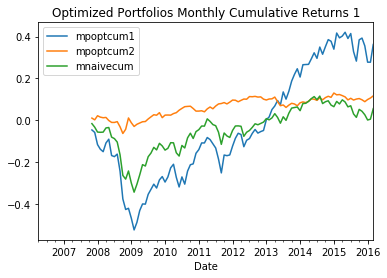

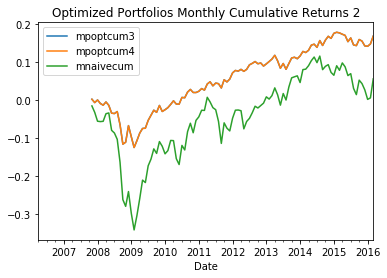

In [27]:
# Cumulative Monthly Returns Chart
mpoptall.plot(y=['mpoptcum1', 'mpoptcum2', 'mnaivecum'])
plt.title('Optimized Portfolios Monthly Cumulative Returns 1')
plt.legend(loc='upper left')
plt.show()

mpoptall.plot(y=['mpoptcum3', 'mpoptcum4', 'mnaivecum'])
plt.title('Optimized Portfolios Monthly Cumulative Returns 2')
plt.legend(loc='upper left')

In [26]:
# Annualized Monthly Return and Standard Deviation Table
mpoptdata = [{'0': '', '1': 'mpoptret1', '2': 'mpoptret2', '3': 'mpoptret3', '4': 'mpoptret4', '5': 'mnaiveret'},
        {'0': 'Annualized Return', '1': mpoptreta1, '2': mpoptreta2, '3': mpoptreta3, '4': mpoptreta4, '5': mnaivereta},
        {'0': 'Annualized Standard Deviation', '1': mpoptstdeva1, '2': mpoptstdeva2, '3': mpoptstdeva3,
         '4': mpoptstdeva4, '5': mnaivestdeva}]
mpopttable = pd.DataFrame(mpoptdata)
print("")
print(mpopttable)
print("")



                               0          1          2          3          4  \
0                                 mpoptret1  mpoptret2  mpoptret3  mpoptret4   
1              Annualized Return  0.0313848  0.0111422  0.0157287  0.0157385   
2  Annualized Standard Deviation   0.167646  0.0392349  0.0467089  0.0467395   

            5  
0   mnaiveret  
1  0.00549536  
2     0.10934  



In [28]:
# Asset Weights Comparison

wesightsoptdata = [{'0': '', '1': 'mpoptret1', '2': 'mpoptret2', '3': 'mpoptret3', '4': 'mpoptret4', '5': 'mnaiveret'},
        {'0': 'U.S. Bonds', '1': bondsopt1, '2': bondsopt2, '3': bondsopt3, '4': bondsopt4, '5': 0.25},
        {'0': 'U.S. Stocks', '1': stocksopt1, '2': stocksopt2, '3': stocksopt3, '4': stocksopt4, '5': 0.25},
        {'0': 'International Bonds', '1': ibondsopt1, '2': ibondsopt2, '3': ibondsopt3, '4': ibondsopt4, '5': 0.25},
        {'0': 'International Stocks', '1': istocksopt1, '2': istocksopt2, '3': istocksopt3, '4': istocksopt4, '5': 0.25}]
wesightsopttable = pd.DataFrame(wesightsoptdata)
print("")
print(wesightsopttable)
print("")


                      0          1            2            3          4  \
0                        mpoptret1    mpoptret2    mpoptret3  mpoptret4   
1            U.S. Bonds          0     0.957463     0.810209   0.809878   
2           U.S. Stocks          1    0.0425367     0.189791   0.190122   
3   International Bonds          0  3.38271e-17  8.61088e-13          0   
4  International Stocks          0            0  1.07163e-13          0   

           5  
0  mnaiveret  
1       0.25  
2       0.25  
3       0.25  
4       0.25  

